# Práctica 5: Solución de ecuaciones diferenciales ordinarias lineales usando la transformada de Laplace.

En la sección anterior, se encontró la solución a una ecuación diferencial de segundo orden usando la {numref}`Tabla_transformadas` para encontrar la similitud de la función $X(s)$ del caso bajo análisis con algún par de transformadas conocido. En esta práctica usaremos la herramienta MATLAB para encontrar la solución de ecuaciones diferenciales, aplicando la transformada de Laplace.

Retomaremos el caso de la ecuación diferencial ordinaria, con condiciones iniciales $x(0)=0.01$ y $\dot{x}(0)=0.5$:

$$
4.5\frac{d^2x(t)}{dt^2}+2\frac{dx(t)}{dt}+350x(t)=0
$$

Al aplicar la transformada de Laplace a esta expresión obtuvimos la función en la variable compleja $s=\sigma +j\omega$ expresada como:

$$
X(s)=\frac{0.045s+2.27}{4.5s^2+2s+350}
$$

En la sección anterior, aplicamos la descomposición en dos fracciones parciales y completamos el trinomio en el denominador para obtener la solución $x(t)$ de la ecuación diferencial original. En esta práctica utilizaremos las herramientas que incluye MATLAB para complementar de forma numérica la aplicación de la transformada de Laplace a la solución de ecuaciones diferenciales. 

La primera herramienta a utilizar es el módulo de transformadas de Laplace con cálculos simbólicos, por ejemplo para encontrar las transformadas de Laplace de las siguientes funciones se utilizan los comandos `syms` para invocar al modo simbólico de MATLAB y las funciones `laplace()` e `ilaplace()` para calcular las transformadas de dominio del tiempo al dominio de la frecuencia y el proceso inverso.

In [7]:
clear
close all
clc

syms t s  % modo simbólico en MATLAB, se expresan las variables a tomarse como simbólicas
disp("transformada de Laplace de la función x(t)")
laplace(exp(-3*t))


transformada de Laplace de la función x(t)


Para ilustrar con un ejemplo, calcularemos simbólicamente la transformada inversa de 

$$
X(s)=\frac{0.045s+2.27}{4.5s^2+2s+350}
$$


In [9]:
ilaplace((0.045*s+2.27)/(4.5*s^2+2*s+350))

Una forma alternativa de abordar el problema es usando el comando `residue()` el cual proporciona una descomposición en fracciones parciales de una funcion $X(s)$. Esta descomposición en fracciones parciales a menudo implica raices complejas, por ejemplo, para la función:

$$
X(s)=\frac{0.045s+2.27}{4.5s^2+2s+350}
$$

Se calcula su expansión en fracciones parciales usando las instrucciones:


In [10]:
clear
close all
clc

num=[0.045 2.27];
den=[4.5 2 350];

[r,p,k] = residue(num,den)

r = 
   0.0050 - 0.0285i
   0.0050 + 0.0285i

p = 
  -0.2222 + 8.8164i
  -0.2222 - 8.8164i


k =

     []



En el arreglo r se almacenan los residuos o bien las raíces del polinomio en la variable compleja $s$ del numerador, mientras que en la variable p se almacenan las raices del denominador que también se conocen como los polos del sistema, finalmente en el arreglo k se almacenan los valores de los coeficientes constantes.
Se puede expresar la forma general de la expansión en fracciones parciales de la función $X(s)$:

$$
X(s)=\frac{0.045s+2.27}{4.5s^2+2s+350}=\frac{0.0050 - 0.0285j}{s+0.2222 + 8.8164j}+\frac{0.0050 + 0.0285j}{s+0.2222 - 8.8164j}
$$

Las raíces complejas almacenadas en $r$ permiter hacer uso de las identidades de Euler y aplicarlas para obtener una forma generalizada del par de transformadas $Ae^{-\alpha t} \leftrightarrows \frac{A}{s+\alpha}$, las identidades de Euler se expresan como:

$$
\begin{eqnarray}
e^{jx}=cos(x)+jsen(x)\\
cos(x)=\frac{e^{jx}+e^{-jx}}{2}\\
sen(x)=\frac{e^{jx}-e^{-jx}}{2j}
\end{eqnarray}
$$

Haciendo uso de estas identidades y con los resultados anteriores se puede obtener la transformada inversa fácilmente, haciendo uso de las identidades de Euler para obtener:

$$
x(t)=(0.0050 - 0.0285j)e^{(-0.2222+8.8164i)t}+(0.0050 + 0.0285j)e^{(-0.2222-8.8164j)t}
$$

Para hacer uso de la identidad de Euler se factoriza el término $e^{-0.2222t}$:

$$
x(t)=e^{-0.2222t} \left ( (0.0050 - 0.0285j)e^{(8.8164j)t}+(0.0050 + 0.0285j)e^{(-8.8164j)t} \right )
$$

Agrupando términos y factorizando el término $e^{8.8164jt}+e^{-8.8164jt}$:



$$
x(t)=e^{-0.2222t} \left ( 0.0050\left (  e^{8.8164jt}+e^{-8.8164jt}\right ) - 0.0285j \left ( e^{8.8164jt}+e^{-8.8164jt} \right ) \right )
$$

Se puede multiplicar y dividir los terminos $ 0.0050 \left (  e^{8.8164jt}+e^{-8.8164jt}\right )$ y $- 0.0285j \left ( e^{8.8164jt}+e^{-8.8164jt} \right ) $ por $2$ y $2j$ respectivamente para obtener:

$$
x(t)=e^{-0.2222t} \left ( \frac{0.01\left (  e^{8.8164jt}+e^{-8.8164jt}\right ) }{2}+ \frac{0.0570\left (  e^{8.8164jt}+e^{-8.8164jt}\right ) }{2j} \right )
$$


Usando $cos(x)=\frac{e^{jx}+e^{-jx}}{2}$ y $sen(x)=\frac{e^{jx}-e^{-jx}}{2j}$ se obtiene finalmente la expresión para la función $x(t)$:

$$
x(t)=e^{-0.2222t} \left ( 0.01cos(8.8164t) + 0.0570sen(8.8164t)\right )
$$

Un ejemplo adicional es el sistema masa-resorte-amortiguador resuelto en la práctica 3, donde la ecuación diferencial adquiere la forma:

$$
0.043\ddot{x}+0.0015\dot{x}+4.3x=0
$$

Con condiciones iniciales $x(0)=0.025~[m]$ y $\dot{x}(0)=0~[m/s]$. Aplicando la transformada de Laplace se obtiene:

$$
0.043[s^2X(s)-sx(0)-\dot{x}(0)]+0.0015[sX(s)-x(0)]+4.3X(s)=0
$$

Sustituyendo $x(0)=0.025$ y $\dot{x}(0)=0$:

$$
0.043[s^2X(s)-0.025s]+0.0015[sX(s)-0.025]+4.3X(s)=0
$$

Despejando $X(s)$:

$$
X(s)=\frac{(0.025)0.043s+3.75\times10^{-5}}{0.043s^2+0.0015s+4.3}
$$


In [4]:
clear
close all
clc

num=[0.025*0.043 3.75e-5];
den=[0.043 0.0015 4.3];

[r,p,k] = residue(num,den)

r = 
   0.0125 - 0.0000i
   0.0125 + 0.0000i

p = 
  -0.0174 +10.0000i
  -0.0174 -10.0000i


k =

     []



Aplicando el procedimiento anterior se tiene que:

$$
x(t)=e^{Re(p)t} \left ( 2Re(r)cos(Im(p)t) + 2Im(r)sen(Im(p)t)\right )
$$

donde $Re(p)$ es la parte real del polo almacenado en el arreglo p, $Im(p)$ es la parte imaginaria del polo almacenado en el mismo arreglo p, $Re(r)$ es la parte real del residuo, almacenado en el arreglo r y $Im(p)$ es la parte imaginaria del residuo almacenado en el mismo arreglo r. Sustituyendo los valores numéricos:

$$
x(t)=e^{-0.0174t} \left ( 2(0.0125)cos(10t) + 2(0)sen(10t)\right )=0.025cos(10t)e^{-0.0174t}
$$

El cual es un resultado muy similar al obtenido en la práctica 3.

## Solución de la ecuación diferencial no homogénea

Retomando el caso de estudio del circuito RLC, se puede ejemplificar el uso del método de la descomposición en fracciones parciales con MATLAB para la solución de ecuaciones diferenciales aplicando la transformada de Laplace.

Para el caso del circuito RLC de la práctica 3, la ecuación diferecial cuando el voltaje de entrada es $1.63u(t)$ tiene la siguiete forma:

$$
  LC\frac{d^2v_c(t)}{dt^2}+RC\frac{dv_c(t)}{dt}+v_c(t)=1.63u(t)
$$

Sustituyendo los valores de $R$, $L$ y $C$ con los reportados en la {numref}`Tabla_paramRLC` se tiene:

$$
  1.661\times 10^{-5}\frac{d^2v_c(t)}{dt^2}+ 0.0018\frac{dv_c(t)}{dt}+v_c(t)=1.63
$$

Aplicado la transformada de Laplace a la ecuación {eq}`edoRLC`, con condiciones iniciales iguales a cero se obtiene:

$$
  1.661\times 10^{-5}s^2V_c(s)+ 0.0018sV_c(s)+V_c(s)=\frac{1.63}{s}
$$

Despejando $V_c(s)$:

$$
V_c(s)=\frac{1.63}{s \left ( 1.661\times 10^{-5}s^2+0.0018s+1\right )}=\frac{1.63}{ \left ( 1.661\times 10^{-5}s^3+0.0018s^2+s\right )}
$$
Usando el comando de MATLAB `residue()`

In [11]:
clear
close all
clc

num=[1.63];
den=[1.661e-5 0.0018 1 0];

[r,p,k] = residue(num,den)

r = 
  -0.8150 + 0.1845i
  -0.8150 - 0.1845i
   1.6300 + 0.0000i

p = 
   1.0e+02 *

  -0.5418 + 2.3931i
  -0.5418 - 2.3931i
   0.0000 + 0.0000i


k =

     []



En este caso se obtiene una constante con valor $1.63$ que acompaña al polo en el origen $0+0j$, el resto de los residuos y polos se usan para construir la respuesta completa usando las reglas expuestas anteriormente, de manera que se obtiene:

```{math}
:label: residuos_general
\begin{equation}
v_c(t)=e^{Re(p)t} \left ( 2Re(r)cos(Im(p)t) + 2Im(r)sen(Im(p)t)\right )
	\end{equation}
```




Sustituyendo los valores numéricos:

$$
v_c(t)=1.63+e^{-54.18t} \left ( 2(-0.8150)cos(239.31t) + 2(-0.1845)sen(239.31t)\right )=
$$

Finalmente:

$$
v_c(t)=1.63-e^{-54.18t} \left ( 1.63cos(239.31t)-0.3690sen(239.31t)\right )
$$

cuya gráfica es similar a la de la ecuación {eq}`sol_vc`


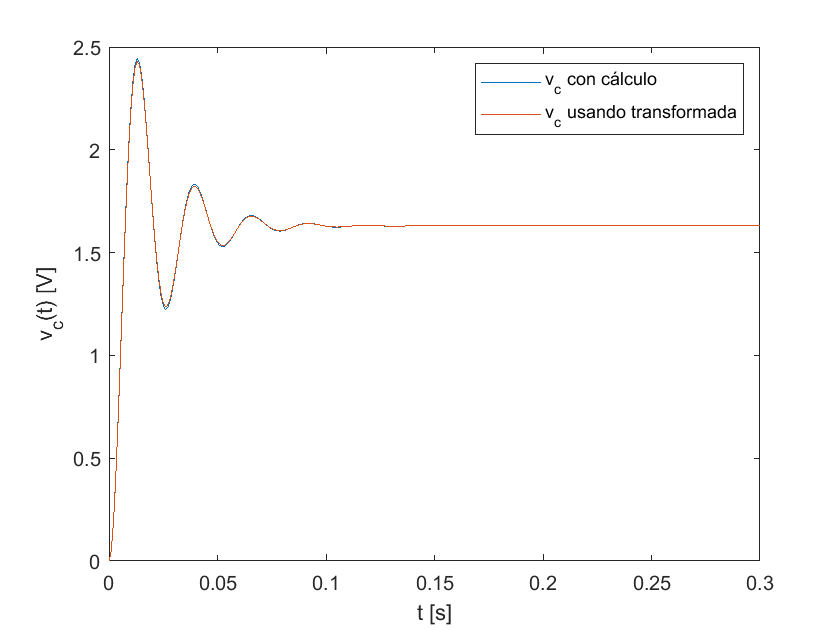

In [6]:
clear 
close all

t=[0:0.001:0.3];
v_c=(-1.63*cos(239.58*t)-0.3605*sin(239.58*t)).*exp(-52.98*t)+1.63;
v_cL=(-1.63*cos(239.31*t)-0.3690*sin(239.58*t)).*exp(-54.18*t)+1.63;
plot(t,v_c)
hold on
plot(t,v_cL)
xlabel("t [s]")
ylabel("v_c(t) [V]")
legend("v_c con cálculo","v_c usando transformada")